In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import pprint

In [48]:
# Specify data path
video_path = "Videos/Data/Female/FemaleBIK.mp4"
data_path = "Videos/Data/Female/FemaleBIK.data"

In [49]:
def readAllFramesDATA(file_path):
    keypoints_vec = []
    angles_vec = []
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            if i==0:
                metadata = json.loads(line)
            else:
                data = json.loads(line)
                keypoints_vec.append(data["keypoints"])
                angles_vec.append(data["angles"])
    #keypoints_vec = np.array(keypoints_vec).astype(float)
    angles_vec = np.array(angles_vec).astype(float)
    return metadata, angles_vec # return metadata, keypoints_vec, angles_vec

In [50]:
# Import data
metadata, angles_vec = readAllFramesDATA(data_path) # metadata, keypoints_vec, angles_vec = readAllFramesDATA(data_path) 
fps = metadata["fps"]
joint_names = metadata["keypoints_names"]
pairs_names = metadata["keypoints_pairs"]
angles_names = ["Knee <- Ankle -> Ground", "Hip <- Knee -> Ankle", "Shoulder <- Hip -> Knee", "Elbow <- Shoulder -> Hip", "Wrist <- Elbow -> Shoulder"]

In [51]:
# Preview metadata
pprint.pprint(metadata)

{'fps': 29,
 'frame_height': 338,
 'frame_width': 600,
 'keypoints_names': ['Right Ankle',
                     'Right Knee',
                     'Right Hip',
                     'Right Shoulder',
                     'Right Elbow',
                     'Right Wrist'],
 'keypoints_pairs': [['Right Shoulder', 'Right Elbow'],
                     ['Right Elbow', 'Right Wrist'],
                     ['Right Shoulder', 'Right Hip'],
                     ['Right Hip', 'Right Knee'],
                     ['Right Knee', 'Right Ankle']],
 'n_frames': 366,
 'n_points': 6,
 'summary': 'None',
 'video_name': 'Female'}


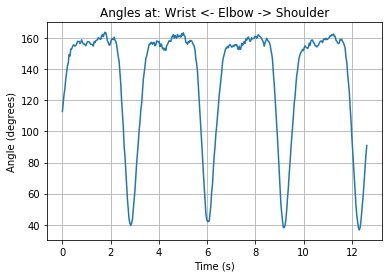

In [52]:
# Plot Angle

joint = "Right Elbow" # Joint name
coord = 'x'
if coord == 'x':
    coord_num = 0
else:
    coord_num = 1

angle_name = "Wrist <- Elbow -> Shoulder" # Joint name
angle_vec = angles_vec[:, angles_names.index(angle_name)]
time_vec = np.linspace(0, len(angle_vec)*(1/fps), len(angle_vec))
plt.figure()
plt.plot(time_vec, angle_vec)
plt.title("Angles at: {}".format(angle_name, coord))
plt.ylabel("Angle (degrees)")
plt.xlabel("Time (s)")
plt.grid(True)
plt.show()